# Importing Dependencies

In [1]:
# Importing all dependencies and libraries.
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import time
warnings.filterwarnings('ignore')

# Importing the CSV Data and Data Exploration

In [2]:
# Loading the Credit Card Data into a Pandas Dataframe.
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Listing the properties of each Dataframe column.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Number of rows and columns in the dataset.
df.shape

(284807, 31)

In [5]:
# Extracting the count of class column values from the dataset.
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Total values in the classes dataframe.
total = classes[0]+classes[1]
total

284807

In [7]:
# Percentage of Normal Transactions in the classes dataframe.
zero_percentage = (classes[0]/total*100)
round(zero_percentage,2)

99.83

In [8]:
# Percentage of Fraudulent Transactions in the classes dataframe.
one_percentage = (classes[1]/total*100)
round(one_percentage,2)

0.17

        Class  Percentage
0      Normal   99.827251
1  Fraudulent    0.172749


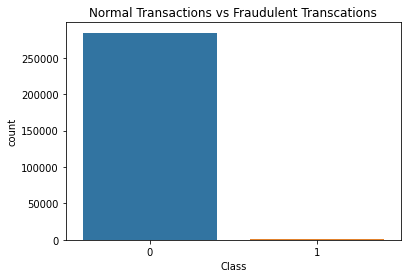

Text(0.5, 1.0, 'Normal Transactions Percentage vs Fraudulent Transcations Percentage')

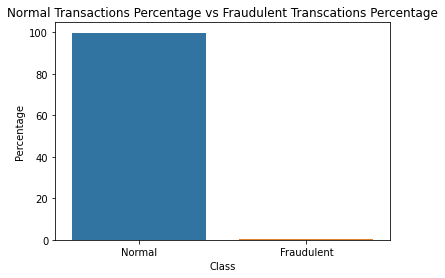

In [9]:
# Visualising the count and percentage of the two Classes.

fraud_splitup = {'Class':['Normal', 'Fraudulent'], 'Percentage':[zero_percentage, one_percentage]} 
df_fraud_splitup = pd.DataFrame(fraud_splitup) 
print(df_fraud_splitup)

sns.countplot(x='Class', data=df)
plt.title('Normal Transactions vs Fraudulent Transcations')
plt.show()

sns.barplot(x='Class',y='Percentage', data=df_fraud_splitup)
plt.title('Normal Transactions Percentage vs Fraudulent Transcations Percentage')

<AxesSubplot:title={'center':'Correlation with class'}>

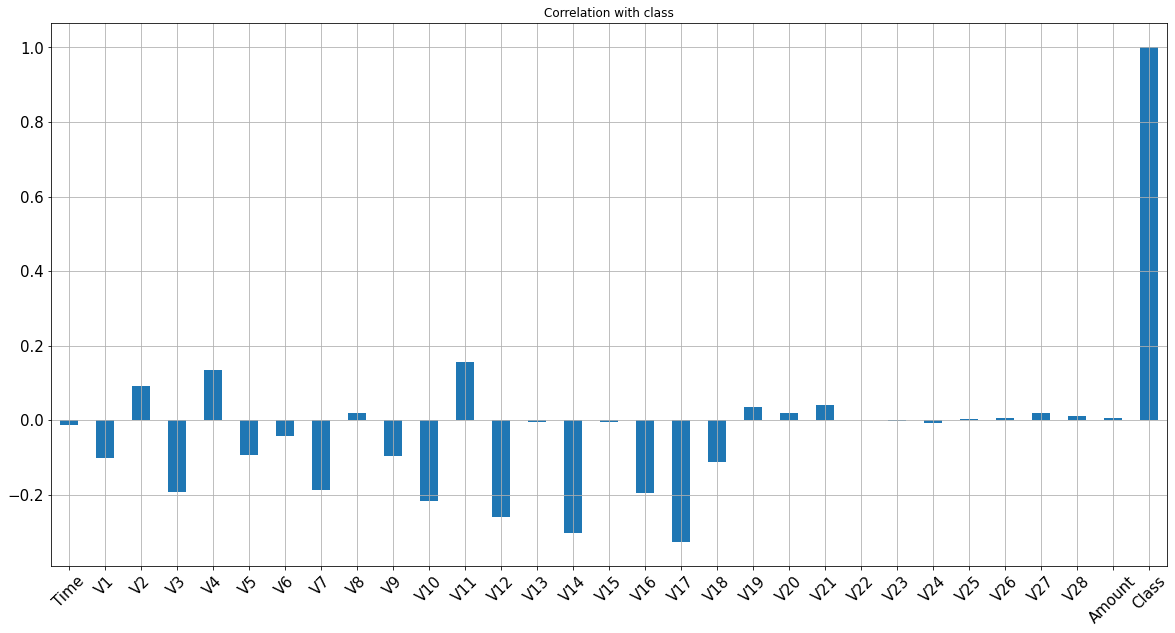

In [10]:
# Visualising the Correlation of all the features with the output classes.
df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [11]:
# The Correlation Matrix.
sns.set(style="white")
corr = df.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447


<AxesSubplot:>

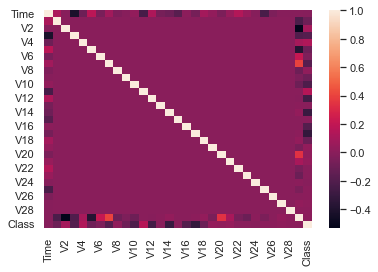

In [12]:
# The Correlation Heatmap.
sns.heatmap(corr)

## Outliers treatment

For this dataset, we are not doing any outliers treatment. Because all of the columns have already been PCA converted, it is anticipated that the outlier values will be taken into account when the data is transformed. Hence, we are not performing any outliers treatment for this particular dataset.

## Density Distribution of Time

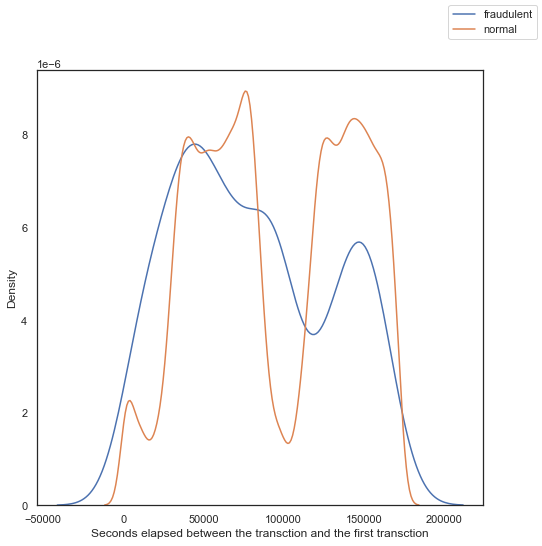

In [13]:
# Observing the distribution of Time for fraud and normal transactions respectively.
fraud_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0]
fig = plt.figure(figsize=(8,8))
ax = sns.distplot(fraud_df['Time'],label='fraudulent',hist=False)
ax = sns.distplot(normal_df['Time'],label='normal',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
fig.legend(labels=['fraudulent','normal'])
plt.show()

In terms of Time, we don't find any distinct pattern between fraudulent and non-fraudulent transactions. As a result, the Time column can be removed.

In [14]:
# Removing the time column from the features.
df.drop('Time', axis=1, inplace=True)

In [15]:
# Maximum and Minimum Amount for the transactions.
max = df['Amount'].max()
min = df['Amount'].min()
print("The max and min amount are " + str(max) + " and " + str(min) + " as follows")

The max and min amount are 25691.16 and 0.0 as follows


The ‘Amount' variable has a range of 0 to 25,691.16. We use standardisation to eliminate the mean and scale to unit variance to narrow the range so that 68 percent of the results are in the middle (-1, 1).

In [16]:
#Stanrdard Scaler Normalization for the Amount feature.
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Amount'], inplace=True, axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


# Model Building

In [17]:
# Splitting data into features and output class labels.
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [18]:
# Splitting data into train and test dataframes.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
# Number of examples in Train and Test Dataset.
print('Train: ', X_train.shape)
print('Test: ', X_test.shape)

test_data_pred =  X_test.copy()
test_data_pred['Actual Class Label'] = y_test

Train:  (199364, 29)
Test:  (85443, 29)


In [20]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Model Training

## Random Forest

In [21]:
# Instantiating a Random Forest Classifier with 100 trees.
rf_model = RandomForestClassifier(n_estimators = 100)

# Fitting the model to the data and recording the training time.
start_rf = time.time()
rf_model.fit(X_train, y_train)
stop_rf = time.time()

In [22]:
# Predicting the output class labels for test data.
y_pred_rf = rf_model.predict(X_test)

In [23]:
# Evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))
print(f"Training time: {stop_rf - start_rf}s")

Accuracy:  0.9995201479348805
Precision:  0.9491525423728814
Recall:  0.7619047619047619
F1 Score:  0.8452830188679245
Training time: 105.97022128105164s


In [24]:
# Confusion Matrix for the test data
print(confusion_matrix( y_test, y_pred_rf))

[[85290     6]
 [   35   112]]


In [25]:
# Classification Report for Random Forest
rf_imb_cls_report = classification_report(y_test, y_pred_rf)
print(rf_imb_cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

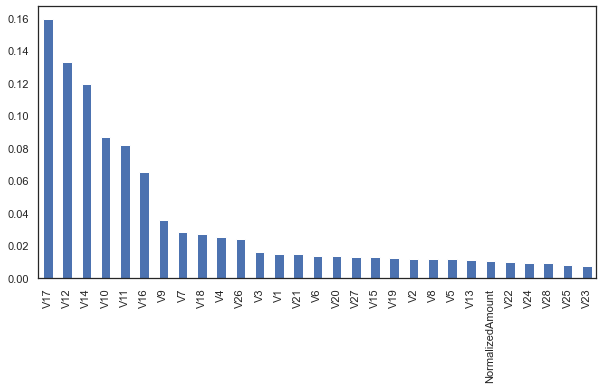

In [26]:
# Feature Importance for Random Forest
var_importance = pd.Series(rf_model.feature_importances_)
var_importance.index = X_train.columns
plt.figure( figsize = (10, 5) )
var_importance.sort_values(ascending = False).plot.bar()

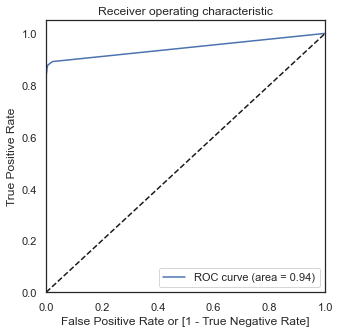

In [27]:
# Predicted probability
y_test_pred_proba = rf_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## KNN

In [28]:
# Instantiating a KNN Classifier with 3 neighbours to be used for query matching.
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
# Recording the training start time.
start_knn = time.time()

In [30]:
# Fitting the model to the data.
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Recording the training end time.
stop_knn = time.time()

In [32]:
# Predicting the output class labels for test data.
y_pred_knn = clf_knn.predict(X_test)

In [33]:
# Evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))
print(f"Training time: {stop_knn - start_knn}s")

Accuracy:  0.9994967405170698
Precision:  0.9482758620689655
Recall:  0.7482993197278912
F1 Score:  0.8365019011406843
Training time: 0.04724550247192383s


In [34]:
# Classification Report
knn_imb_cls_report = classification_report(y_test, y_pred_knn)
print(knn_imb_cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.75      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



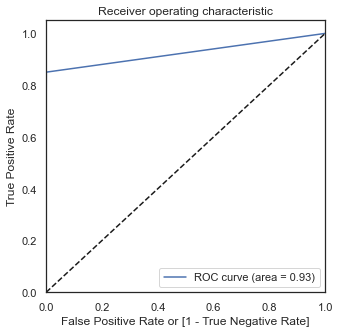

In [35]:
# Predicted probability
y_test_pred_proba = clf_knn.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Decision Tree

In [36]:
# Instantiating a Decision Tree Classifier with default parameters.
decision_tree_model = DecisionTreeClassifier()

# Fitting the model to the data and recording the training time.
start_dt = time.time()
decision_tree_model.fit(X_train, y_train)
stop_dt = time.time()

In [37]:
# Predicting the output class labels for test data.
y_pred_dt = decision_tree_model.predict(X_test)

In [38]:
# Evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Precision: ", precision_score(y_test, y_pred_dt))
print("Recall: ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))
print(f"Training time: {stop_dt - start_dt}s")

Accuracy:  0.9992626663389628
Precision:  0.8
Recall:  0.7619047619047619
F1 Score:  0.7804878048780488
Training time: 8.58752989768982s


In [39]:
# Classification Report
dt_imb_cls_report = classification_report(y_test, y_pred_dt)
print(dt_imb_cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



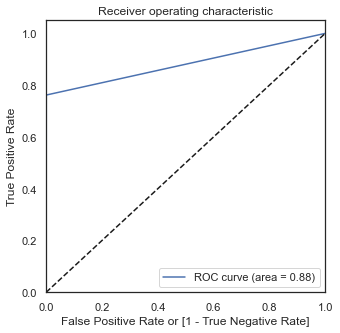

In [40]:
# Predicted probability
y_test_pred_proba = decision_tree_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

## Logistic Regression

In [41]:
# Instantiating a Logistic Regression Classifier with default parameters.
classifier = LogisticRegression(random_state = 0)

In [42]:
# Recording the training start time.
start_lr = time.time()

In [43]:
# Fitting the model to the data.
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
# Recording the training end time.
stop_lr = time.time()

In [45]:
# Predicting the output class labels for test data.
y_pred_lr = classifier.predict(X_test)

In [46]:
# Evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Precision: ", precision_score(y_test, y_pred_lr))
print("Recall: ", recall_score(y_test, y_pred_lr))
print("F1 Score: ", f1_score(y_test, y_pred_lr))
print(f"Training time: {stop_lr - start_lr}s")

# Classification Report
lr_imb_cls_report = classification_report(y_test, y_pred_lr)
print(lr_imb_cls_report)

Accuracy:  0.999204147794436
Precision:  0.883495145631068
Recall:  0.6190476190476191
F1 Score:  0.728
Training time: 0.9340100288391113s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



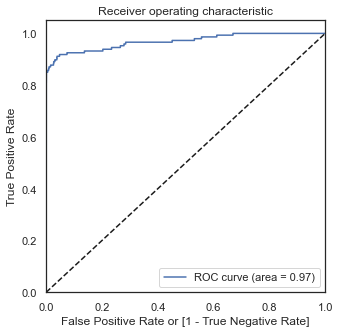

In [47]:
# Predicted probability
y_test_pred_proba = classifier.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## SMOTE 

In [48]:
# Using SMOTE analysis on the train dataset for oversampling to tackle class imbalance problem.
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
X_train_rs, y_train_rs = sm.fit_resample(X_train, y_train)

In [49]:
# Number of rows and columns in the train dataset after oversampling.
X_train_rs.shape

(398038, 29)

In [50]:
# Checking the number of samples for each class.
(y_train_rs).value_counts()

0    199019
1    199019
Name: Class, dtype: int64

## Random Forest after SMOTE

In [51]:
# Instantiating a Random Forest Classifier with 100 trees.
rf_model_rs = RandomForestClassifier(n_estimators = 100)

# Fitting the model to the data and recording the training time.
start_rf_rs = time.time()
rf_model_rs.fit(X_train_rs, y_train_rs)
stop_rf_rs = time.time()

In [52]:
# Predicting the output class labels for test data.
y_pred_rf = rf_model_rs.predict(X_test)

# Saving the predictions to a CSV file.
test_data_pred['RF Balanced Predictions'] = y_pred_rf
test_data_pred.to_csv('Test_Data_Predictions.csv')

In [53]:
# Evaluation metrics

print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))
print(f"Training time: {stop_rf_rs - start_rf_rs}s")

# Classification Report

rf_bal_cls_report = classification_report(y_test, y_pred_rf)
print(rf_bal_cls_report)

Accuracy:  0.9995318516437859
Precision:  0.9083969465648855
Recall:  0.8095238095238095
F1 Score:  0.856115107913669
Training time: 206.9668505191803s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.81      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [54]:
# Confusion Matrix for the test data

print(confusion_matrix(y_test, y_pred_rf))

[[85284    12]
 [   28   119]]


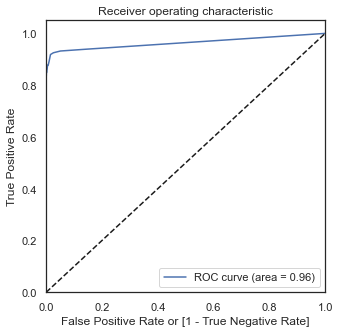

In [55]:
# Predicted probability
y_test_pred_proba = rf_model_rs.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

<AxesSubplot:>

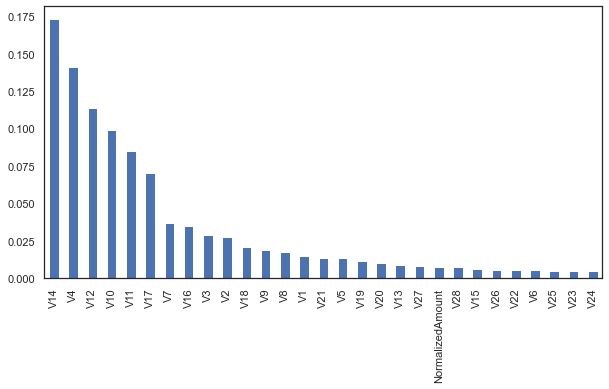

In [56]:
# Feature Importance for Random Forest

var_importance = pd.Series(rf_model_rs.feature_importances_)
var_importance.index = X_train.columns
plt.figure( figsize = (10, 5) )
var_importance.sort_values(ascending = False).plot.bar()

## Logistic Regression after SMOTE

In [57]:
# Instantiating a Logistic Regression Classifier with default parameters.
classifier_rs = LogisticRegression(random_state = 0)

# Fitting the model to the data and recording the training time.
start_lr_rs = time.time()
classifier_rs.fit(X_train_rs, y_train_rs)
stop_lr_rs = time.time()

In [58]:
# Predicting the output class labels for test data.
y_pred_lr = classifier_rs.predict(X_test)

# Saving the predictions to a CSV file.
test_data_pred['LR Balanced Predictions'] = y_pred_lr
test_data_pred.to_csv('Test_Data_Predictions.csv')

In [59]:
# Evaluation metrics

print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Precision: ", precision_score(y_test, y_pred_lr))
print("Recall: ", recall_score(y_test, y_pred_lr))
print("F1 Score: ", f1_score(y_test, y_pred_lr))
print(f"Training time: {stop_lr_rs - start_lr_rs}s")

# Confusion Matrix for the test data

print(confusion_matrix( y_test, y_pred_lr))

# Classification Report

lr_bal_cls_report = classification_report(y_test, y_pred_lr)
print(lr_bal_cls_report)

Accuracy:  0.9753402853364231
Precision:  0.06053811659192825
Recall:  0.9183673469387755
F1 Score:  0.1135885570046277
Training time: 2.2686145305633545s
[[83201  2095]
 [   12   135]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



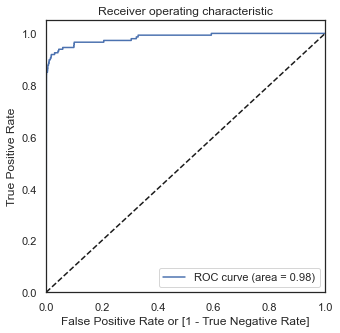

In [60]:
# Predicted probability
y_test_pred_proba = classifier_rs.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

## KNN after SMOTE

In [61]:
# Instantiating a KNN Classifier with 3 neighbours to be used for query matching.
clf_knn_rs = KNeighborsClassifier(n_neighbors=3)

# Fitting the model to the data and recording the training time.
start_knn_rs = time.time()
clf_knn_rs.fit(X_train_rs, y_train_rs)
stop_knn_rs = time.time()

In [62]:
# Predicting the output class labels for test data.
y_pred_knn = clf_knn_rs.predict(X_test)

# Saving the predictions to a CSV file.
test_data_pred['KNN Balanced Predictions'] = y_pred_knn
test_data_pred.to_csv('Test_Data_Predictions.csv')

In [63]:
# Evaluation metrics

print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))
print(f"Training time: {stop_knn_rs - start_knn_rs}s")

Accuracy:  0.9987711105649381
Precision:  0.6
Recall:  0.8571428571428571
F1 Score:  0.7058823529411764
Training time: 0.04114723205566406s


In [64]:
# Confusion Matrix for the test data

print(confusion_matrix( y_test, y_pred_knn))

[[85212    84]
 [   21   126]]


In [65]:
# Classification Report
print('Classification Report.')
knn_bal_cls_report = classification_report(y_test, y_pred_knn)
print(knn_bal_cls_report)

Classification Report.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.60      0.86      0.71       147

    accuracy                           1.00     85443
   macro avg       0.80      0.93      0.85     85443
weighted avg       1.00      1.00      1.00     85443



Plot the ROC curve.


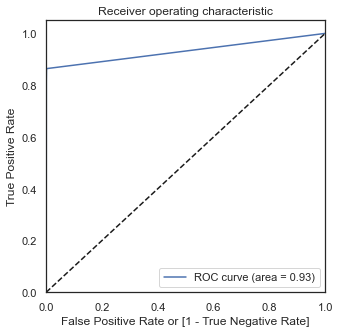

In [66]:
# Predicted probability
y_test_pred_proba = clf_knn_rs.predict_proba(X_test)[:,1]

# Plot the ROC curve
print('Plot the ROC curve.')
draw_roc(y_test, y_test_pred_proba)

## Decision Tree after SMOTE

In [67]:
# Instantiating a Decision Tree Classifier with default parameters.
decision_tree_model_rs = DecisionTreeClassifier()

# Fitting the model to the data and recording the training time.
start_dt_rs = time.time()
decision_tree_model_rs.fit(X_train_rs, y_train_rs)
stop_dt_rs = time.time()

In [68]:
# Predicting the output class labels for test data.
y_pred_dt = decision_tree_model_rs.predict(X_test)

# Saving the predictions to a CSV file.
test_data_pred['DT Balanced Predictions'] = y_pred_dt
test_data_pred.to_csv('Test_Data_Predictions.csv')

In [69]:
# Evaluation metrics
print('Evaluation metrics.')
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Precision: ", precision_score(y_test, y_pred_dt))
print("Recall: ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))
print(f"Training time: {stop_dt_rs - start_dt_rs}s")

Evaluation metrics.
Accuracy:  0.9973666654962958
Precision:  0.3717105263157895
Recall:  0.7687074829931972
F1 Score:  0.5011086474501109
Training time: 22.34300994873047s


In [70]:
# Confusion Matrix for the test data
print('Confusion Matrix for the test data.')
print(confusion_matrix( y_test, y_pred_dt))

Confusion Matrix for the test data.
[[85105   191]
 [   34   113]]


In [71]:
# Classification Report
print('Classification Report.')
dt_bal_cls_report = classification_report(y_test, y_pred_dt)
print(dt_bal_cls_report)

Classification Report.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.37      0.77      0.50       147

    accuracy                           1.00     85443
   macro avg       0.69      0.88      0.75     85443
weighted avg       1.00      1.00      1.00     85443



plot the ROC curve.


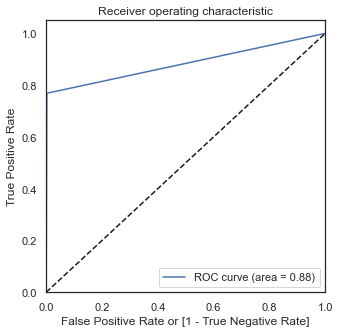

In [72]:
# Predicted probability
y_test_pred_proba = decision_tree_model_rs.predict_proba(X_test)[:,1]

print('plot the ROC curve.')
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Summary of all Models

In [73]:
print('Unbalanced Random Forest')
print(rf_imb_cls_report + '\n\n')
print('Balanced Random Forest')
print(rf_bal_cls_report)

Unbalanced Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Balanced Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.81      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [74]:
print('Unbalanced Logistic Regression')
print(lr_imb_cls_report + '\n\n')
print('Balanced Logistic Regression')
print(lr_bal_cls_report)

Unbalanced Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Balanced Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [75]:
print('Unbalanced KNN')
print(knn_imb_cls_report + '\n\n')
print('Balanced KNN')
print(knn_bal_cls_report)

Unbalanced KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.75      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Balanced KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.60      0.86      0.71       147

    accuracy                           1.00     85443
   macro avg       0.80      0.93      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [76]:
print('Unbalanced Decision Tree')
print(dt_imb_cls_report + '\n\n')
print('Balanced Decision Tree')
print(dt_bal_cls_report)

Unbalanced Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



Balanced Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.37      0.77      0.50       147

    accuracy                           1.00     85443
   macro avg       0.69      0.88      0.75     85443
weighted avg       1.00      1.00      1.00     85443



I used Accuracy, Precision, Recall, F1 Score and ROC-AUC Curve along with the training time to evaluate the performance of our models. It was observed that Random Forest performed the best overall in terms of Precision, Recall, F1 Score and ROC-AUC and even saw an improvement after applying SMOTE analysis to the training dataset. The F1 score increased from 0.84 to 0.86 and ROC-AUC jumped from 0.94 from 0.97 after applying the SMOTE analysis. Apart from all these evaluation metrics, the interpretability of the model should also be considered as understanding the logic behind every prediction of the model is essential in the field of cybersecurity due to the implications of the decisions.

### The following Codes have been referenced for this project:
1. Sahidul Shaikh (2021). Credit Card Fraud Detection [Source Code]. https://github.com/sahidul-shaikh/credit-card-fraud-detection

2. Luke (2020). Credit Card Prediction [Source Code]. https://github.com/luke4u/Credit-Card-Prediction